In [11]:
from gensim.utils import simple_preprocess
import nltk
from gensim.models import Word2Vec

from sklearn.manifold import TSNE
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


import re

In [12]:
#importation du texte:
fichier = open(r"C:\Users\hadrien\Documents\Personnel\formation data\Projet\livre eng\The-Lord-of-the-Rings-Illustrated-Ed...-Z-Library.txt", 'r', encoding='utf-8')

nombre_lignes_voulues = 24000
texte = ""
for i in range(nombre_lignes_voulues):
    ligne = fichier.readline()
    if not ligne:
        break
    texte += ligne

fichier.close()


In [13]:

# Création du modèle Word2Vec:
nltk.download('punkt')
sentences = nltk.sent_tokenize(texte)
corpus = [simple_preprocess(sentence) for sentence in sentences]

model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, sg=0)

model.build_vocab(corpus, progress_per=1000000)

words = list(model.wv.index_to_key)
print('Vocabulary size: %d' % len(words))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hadrien\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Vocabulary size: 13413


In [14]:

# Entraînement du modèle
model.train(corpus, total_examples=len(corpus), epochs=10)


(3626395, 4912710)

In [15]:
#test similarité frodo et sam:
print('Similarity between \'frodo\' and \'sam\': ', model.wv.similarity("frodo", "sam"))

Similarity between 'frodo' and 'sam':  0.83007693


In [16]:
#Test les mots les plsu rpoches de frodo:
model.wv.most_similar(positive=["frodo"])

[('pippin', 0.8451120853424072),
 ('sam', 0.8300769329071045),
 ('gollum', 0.8105878829956055),
 ('strider', 0.7848350405693054),
 ('merry', 0.7838270664215088),
 ('butterbur', 0.7487803101539612),
 ('gandalf', 0.7246379256248474),
 ('bilbo', 0.7145907878875732),
 ('he', 0.7045426964759827),
 ('baggins', 0.6813153028488159)]

In [17]:
#Importation liste personnages LOTR:
personnages_lotr= ['Strider', 'Merry', 'Gimli', 'Durin', 'Bilbo', 'Gollum', 'Baggins', 'Galadriel', 'Frodo', 'Sam Gamgee', 'Gaffer', 'Brandybuck', 'Sam', 'Pippin', 'Ted', 'Gil-galad', 'Sméagol', 'Gildor', 'Maggot', 'Tom', 'Tom Bombadil', 'Goldberry', 'Butterbur', 'Barliman', 'Bill Ferny', 'Ranger', 'Bill', 'Tinúviel', 'Beren', 'Glorfindel', 'Arwen', 'Elrohir', 'Legolas', 'Boromir', 'Saruman', 'Nazgûl', 'Aragorn', 'Gwaihir', 'Aragorn.', 'Eorl', 'Éomer', 'Thengel', 'Uglúk', 'Grishnákh', 'Treebeard', 'Bregalad', 'Théoden', 'Wormtongue', 'Gríma', 'Éowyn', 'Snowmane', 'Faramir', 'Samwise', 'Shelob', 'Shagrat', 'Denethor', 'Beregond', 'Bergil', 'Dernhelm', 'Imrahil', 'Rosie', 'Sharkey', 'Cotton', 'Farmer Cotton']

def preprocess_name(name):
    name = name.lower()
    name = name.strip()
    name = re.sub(r'[^\w\s]', '', name)
    return name

personnages_lotr = [preprocess_name(name) for name in personnages_lotr]

liste_a_supprimer = ['bilbo baggins', 'sam gamgee','gilgalad', 'tom bombadil', 'bill ferny','farmer cotton']  

for nom in liste_a_supprimer:
    if nom in personnages_lotr:
        personnages_lotr.remove(nom)

personnages_lotr.append('gandalf')
print(personnages_lotr)

['strider', 'merry', 'gimli', 'durin', 'bilbo', 'gollum', 'baggins', 'galadriel', 'frodo', 'gaffer', 'brandybuck', 'sam', 'pippin', 'ted', 'sméagol', 'gildor', 'maggot', 'tom', 'goldberry', 'butterbur', 'barliman', 'ranger', 'bill', 'tinúviel', 'beren', 'glorfindel', 'arwen', 'elrohir', 'legolas', 'boromir', 'saruman', 'nazgûl', 'aragorn', 'gwaihir', 'aragorn', 'eorl', 'éomer', 'thengel', 'uglúk', 'grishnákh', 'treebeard', 'bregalad', 'théoden', 'wormtongue', 'gríma', 'éowyn', 'snowmane', 'faramir', 'samwise', 'shelob', 'shagrat', 'denethor', 'beregond', 'bergil', 'dernhelm', 'imrahil', 'rosie', 'sharkey', 'cotton', 'gandalf']


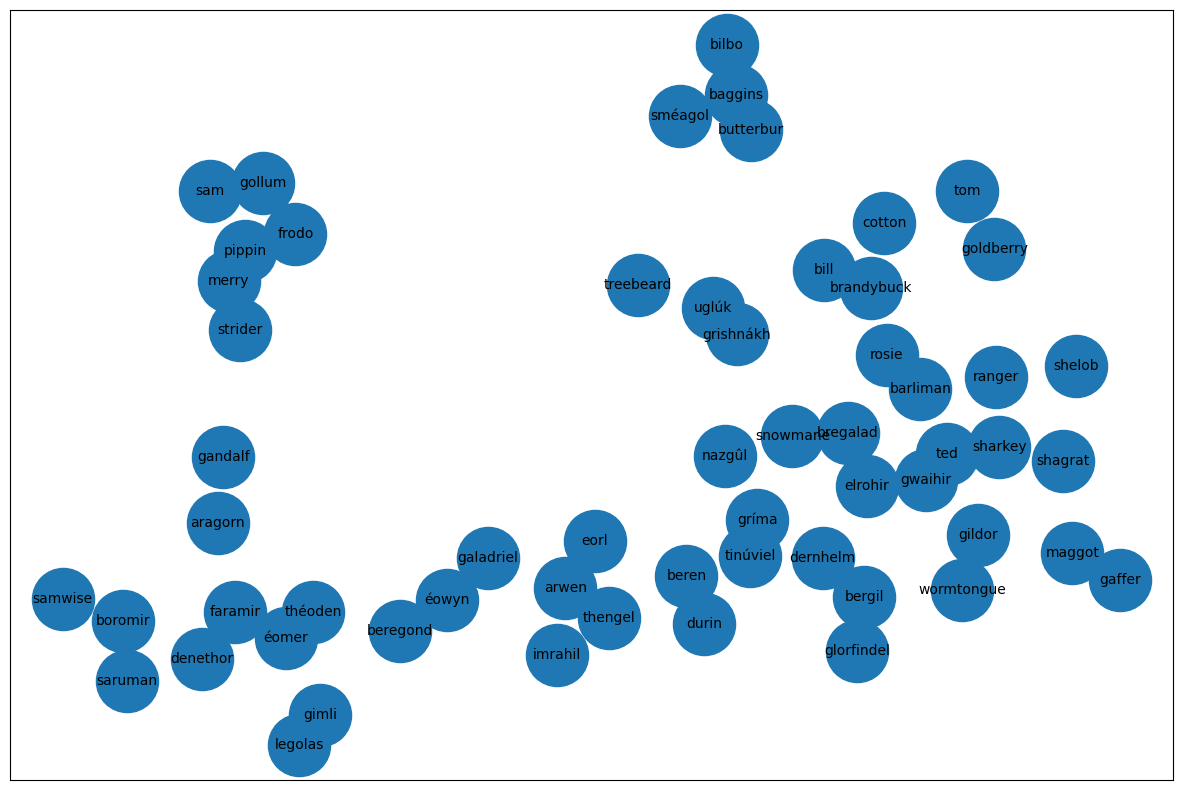

In [18]:
#Création graphe networkX:

vectors = {personnage: model.wv[personnage] for personnage in personnages_lotr}

vector_array = np.array([vectors[personnage] for personnage in personnages_lotr])


tsne = TSNE(n_components=2, random_state=0, perplexity=5)
vectors_2d = tsne.fit_transform(vector_array)

G = nx.Graph()

for i, personnage in enumerate(personnages_lotr):
    G.add_node(personnage, pos=vectors_2d[i])


for i, personnage1 in enumerate(personnages_lotr):
    for j, personnage2 in enumerate(personnages_lotr):
        if i < j:
            similarity = np.dot(vectors[personnage1], vectors[personnage2])
            G.add_edge(personnage1, personnage2, weight=similarity)


plt.figure(figsize=(15, 10))  
pos = nx.get_node_attributes(G, 'pos')
nx.draw_networkx_nodes(G, pos, node_size=2000)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.show()

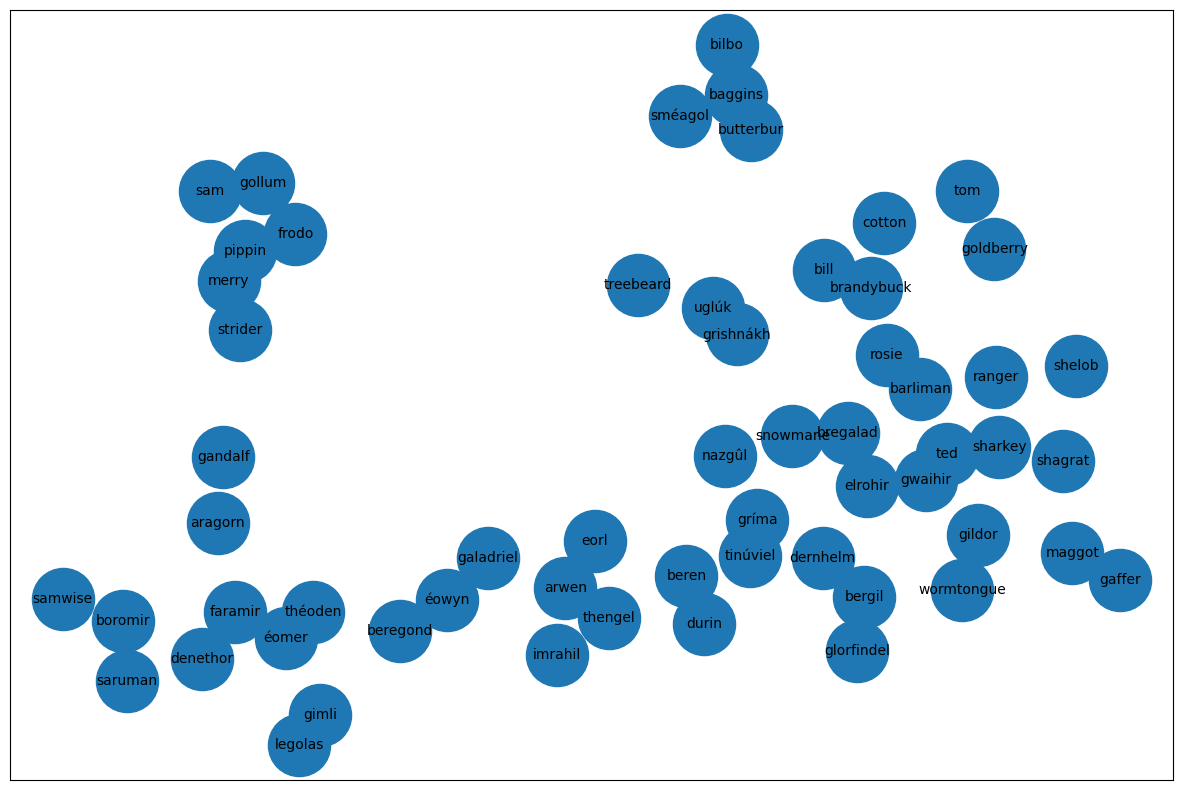

In [19]:
plt.figure(figsize=(15, 10))  # Ajustez les dimensions selon vos préférences

# Dessiner uniquement les nœuds sans les arêtes
nx.draw_networkx_nodes(G, pos, node_size=2000)
nx.draw_networkx_labels(G, pos, font_size=10)
# Afficher la figure agrandie
plt.show()

In [20]:
#Faire une détection de communauté avec Louvain:
from community.community_louvain import best_partition
best_part = best_partition(G)

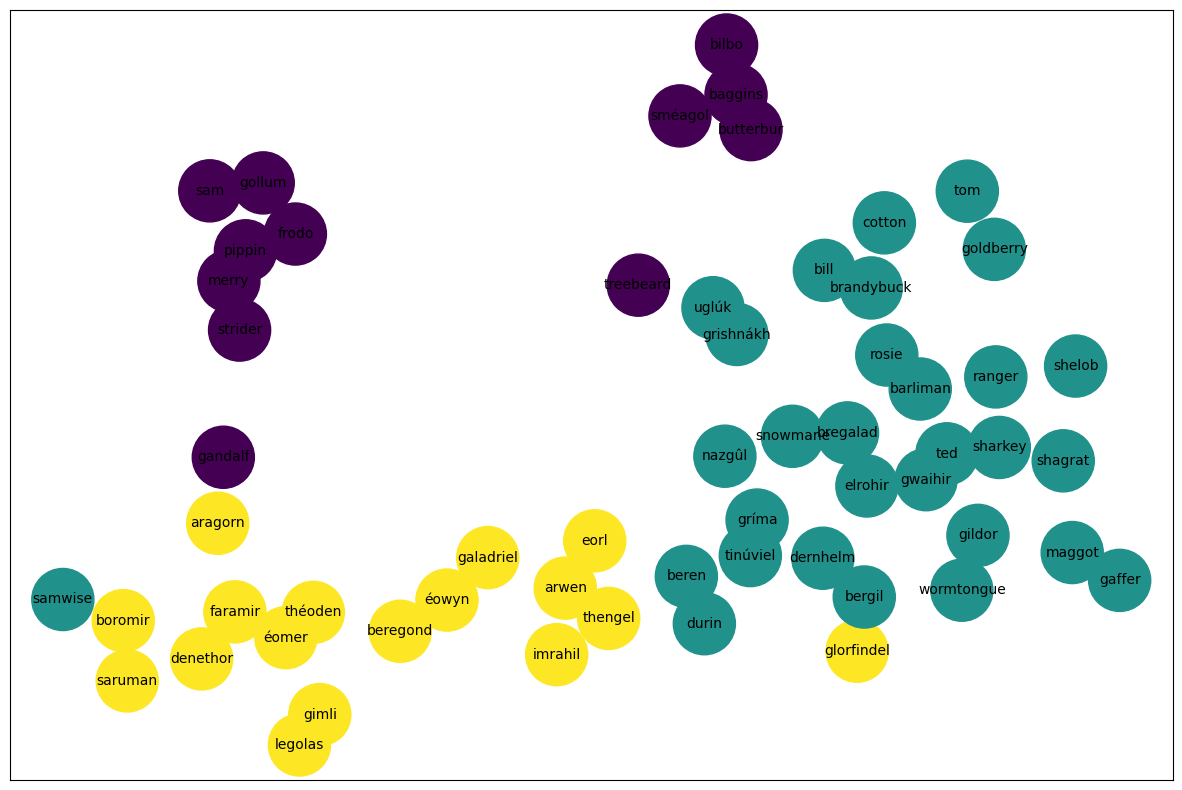

In [21]:

plt.figure(figsize=(15, 10)) 
pos = nx.get_node_attributes(G, 'pos')
node_cluster = list(best_part.values())
nx.draw_networkx_nodes(G, pos, node_color = node_cluster,node_size=2000)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.show()

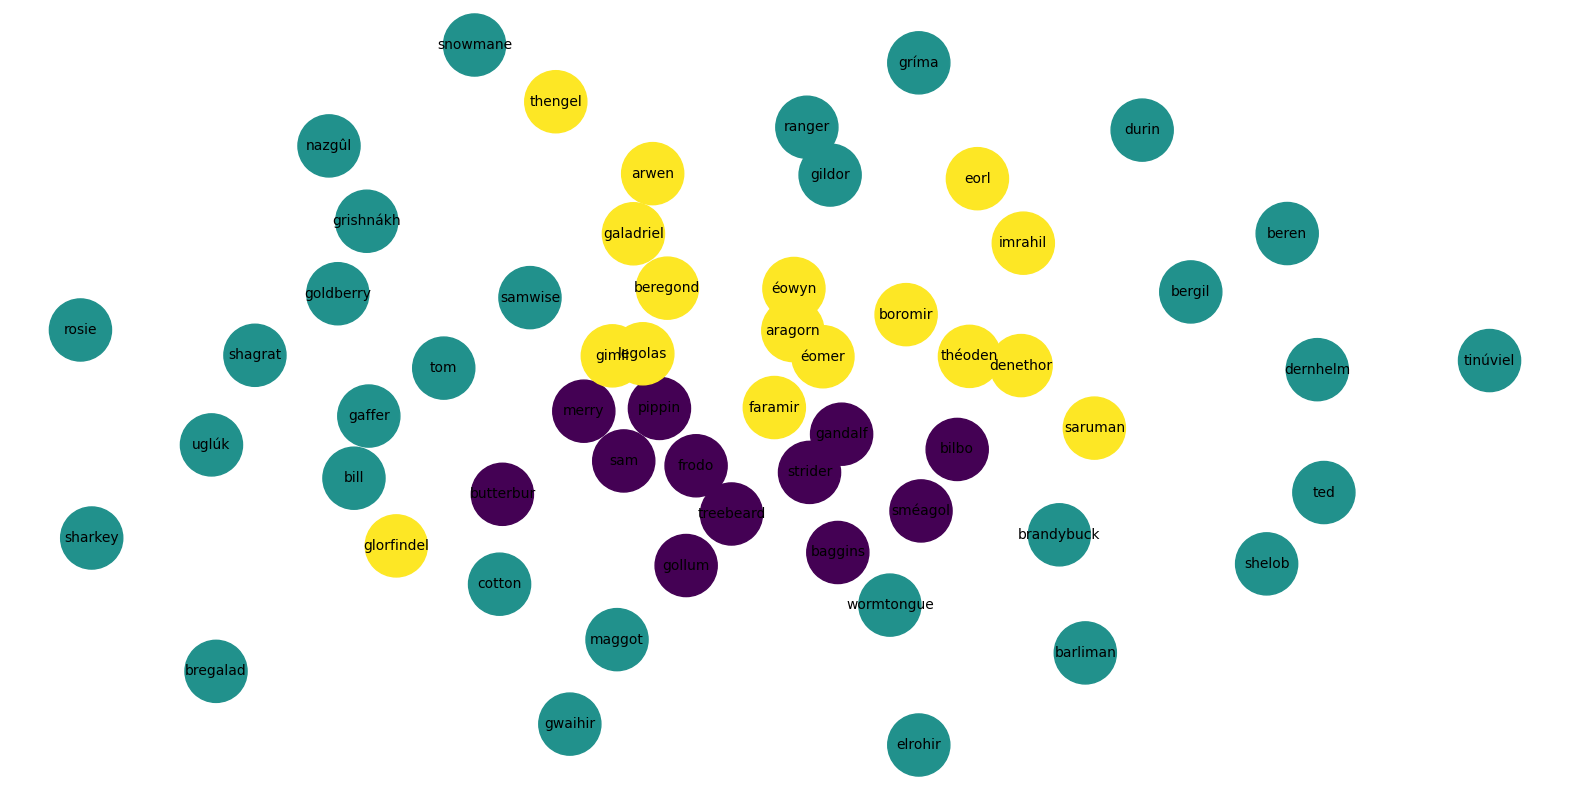

In [22]:
#Faire une détection de communauté avec freuchtmann:
plt.figure(figsize=(20,10))
plt.axis('off')
pos = nx.fruchterman_reingold_layout(G)
node_cluster = list(best_part.values())
nx.draw_networkx_nodes(G, pos, node_color = node_cluster,node_size=2000)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.show()


In [23]:
#Faire un graphe en 3D des personnages:
from mpl_toolkits.mplot3d import Axes3D
pos_3d = nx.spring_layout(G, dim=3)
unique_communities = set(best_part.values())
community_colors = dict(zip(unique_communities, plt.cm.viridis(np.linspace(0, 1, len(unique_communities)))))

In [24]:
import plotly.graph_objects as go

node_names = [str(node) for node in G.nodes()]
trace = go.Scatter3d(
    x=[pos_3d[node][0] for node in G.nodes()],
    y=[pos_3d[node][1] for node in G.nodes()],
    z=[pos_3d[node][2] for node in G.nodes()],
    mode='markers',
    marker=dict(
        size=10,  
        color=[community_colors[best_part[node]] for node in G.nodes()],
        opacity=0.7,
    ),
    text=node_names,  
)

layout = go.Layout(
    title="Les Communautés de l'Anneau",
    scene=dict(
        xaxis=dict(title='X Label', showgrid=False, showticklabels=False),
        yaxis=dict(title='Y Label', showgrid=False, showticklabels=False),
        zaxis=dict(title='Z Label', showgrid=False, showticklabels=False)
    )
)

fig = go.Figure(data=[trace], layout=layout)

fig.show()

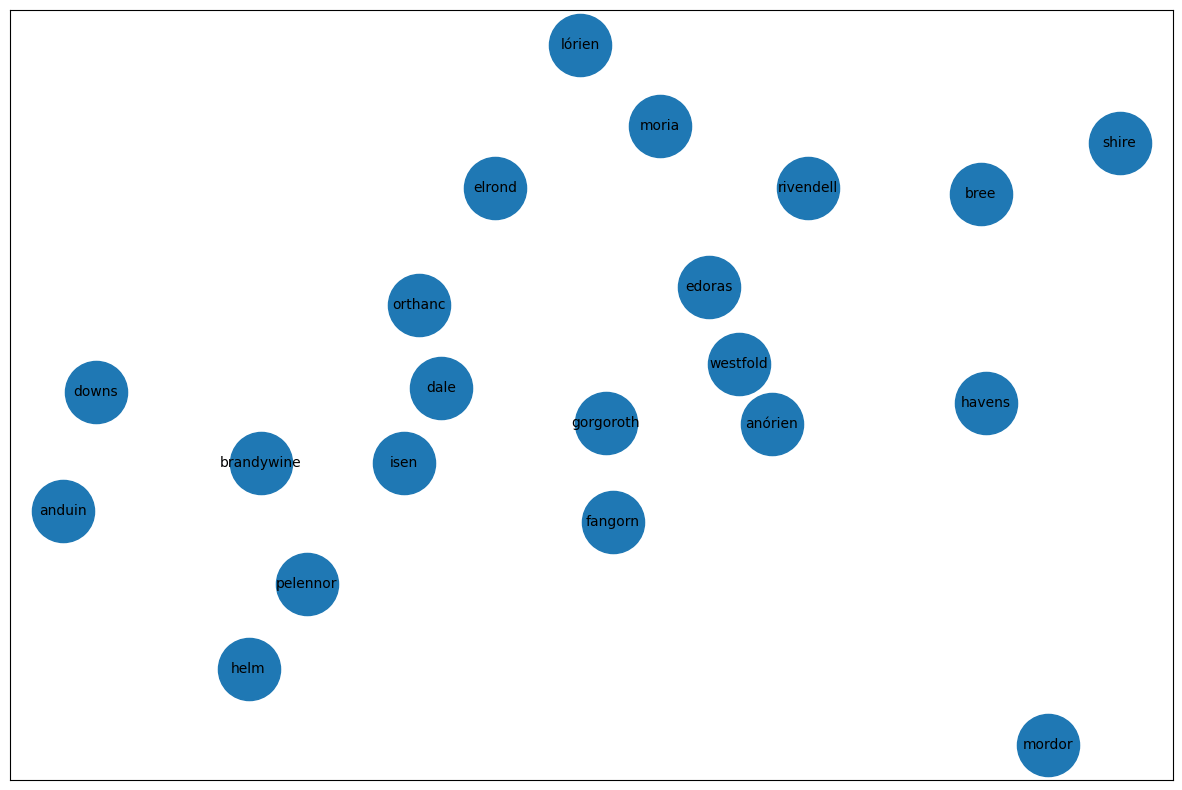

In [30]:
#Faire un graphe en 3D des lieux:
lieu_lotr= ["moria", "mordor", "anórien", "bree", "brandywine","shire","anduin","dale","rivendell","mordor","downs","elrond","lórien","gorgoroth","havens","orthanc","edoras","isen","fangorn","helm","westfold","pelennor"]
vectors = {personnage: model.wv[personnage] for personnage in lieu_lotr}

vector_array = np.array([vectors[personnage] for personnage in lieu_lotr])

tsne = TSNE(n_components=2, random_state=0, perplexity=5)
vectors_2d = tsne.fit_transform(vector_array)

G = nx.Graph()

for i, personnage in enumerate(lieu_lotr):
    G.add_node(personnage, pos=vectors_2d[i])


for i, personnage1 in enumerate(lieu_lotr):
    for j, personnage2 in enumerate(lieu_lotr):
        if i < j:
            similarity = np.dot(vectors[personnage1], vectors[personnage2])
            G.add_edge(personnage1, personnage2, weight=similarity)

plt.figure(figsize=(15, 10))  

pos = nx.get_node_attributes(G, 'pos')
nx.draw_networkx_nodes(G, pos, node_size=2000)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.show()

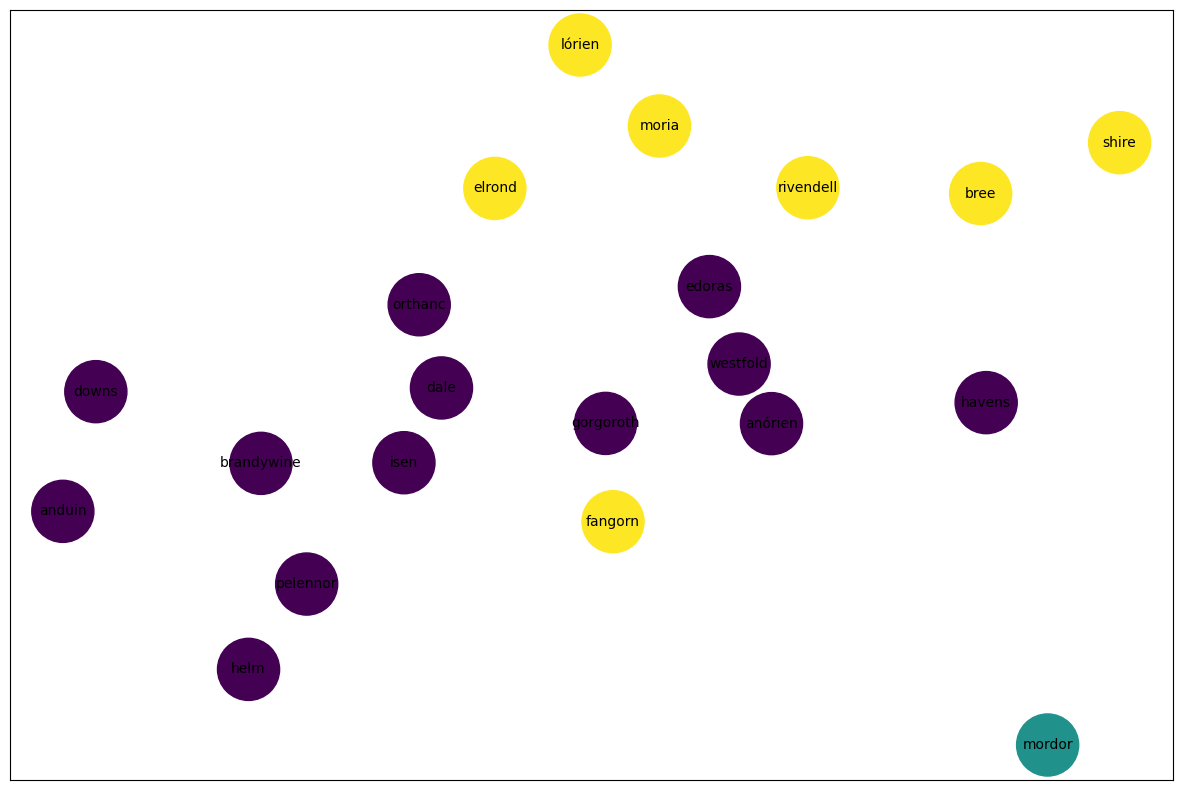

In [31]:
#Faire une repartition avec Louvain:
best_part = best_partition(G)
plt.figure(figsize=(15, 10)) 
pos = nx.get_node_attributes(G, 'pos')
node_cluster = list(best_part.values())
nx.draw_networkx_nodes(G, pos, node_color = node_cluster,node_size=2000)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.show()